# **Ranneeti 24: Strategic Management Challenge**
### ***Indian Institute of Technology (Indian School of Mines)***
---

## **Six Sigma Project: Optimizing Account Openng Process at Bank XYZ**

## Submitted By:
### **Team - KRISHNA**
1.  ### 🧑‍💼 **Shuvendu Pritam Das**
2.  ### 🧑‍💼 **Vipul Singh**
3.  ### 🧑‍💼 **Prashant Kumar**
4.  ### 🧑‍💼 **Pradyumn Sharma**


*Data Science / ML Enthusiast*  

- **GitHub:** [SPritamDas](https://github.com/SPritamDas/My-Profile)  
- **LinkedIn:** [Shuvendu Pritam Das](https://www.linkedin.com/in/shuvendupritamdas/)  
- **Email:** shuvendupritamdas181@gmail.com  

---



In [2]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

import os
import time
import sys
import datetime
import pickle

import warnings
warnings.filterwarnings('ignore')

In [3]:
data_before = pd.read_excel(r"C:\Users\shuve\Desktop\_ranneetidata _cleaned.xlsx", sheet_name = 'Sheet1',index_col=0)
data_after = pd.read_excel(r"C:\Users\shuve\Desktop\_ranneetidata _cleaned.xlsx", sheet_name = 'Sheet4',index_col=0)
cause_1 = pd.read_excel(r"C:\Users\shuve\Desktop\_ranneetidata _cleaned.xlsx", sheet_name = 'Sheet2',header=1)
cause_2 = pd.read_excel(r"C:\Users\shuve\Desktop\_ranneetidata _cleaned.xlsx", sheet_name = 'Sheet3',header=1)

## Before Data

In [5]:
data_before.head()

,Defects,Operator,Operator Type of Employee,Training Duration (Hours),Processing Time (Hours),Processing Time Met
CAF No,,,,,,
1,0,Vintage,Full Time,16,34.29,Yes
2,5,New Recruits,Part Time,4,35.40,Yes
3,0,Vintage,Part Time,16,36.89,Yes
4,0,Vintage,Full Time,16,44.50,Yes
5,0,New Recruits,Part Time,16,31.58,Yes


In [6]:
data_before = data_before.rename(columns={
    'CAF No': 'CAF_No',
    'Defects': 'Defects',
    'Operator': 'Operator',
    'Operator Type of Employee': 'Operator_Type_of_Employee',
    'Training Duration (Hours)': 'Training_Duration_Hours',
    'Processing Time (Hours)': 'Processing_Time_Hours',
    'Processing Time Met': 'Processing_Time_Met'
})

In [7]:
data_before.columns

Index(['Defects', 'Operator', 'Operator_Type_of_Employee',
       'Training_Duration_Hours', 'Processing_Time_Hours',
       'Processing_Time_Met'],
      dtype='object')

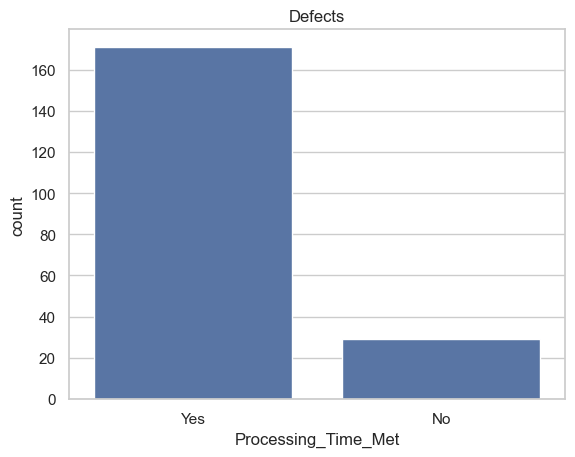

In [8]:
sns.countplot(data = data_before, x = 'Processing_Time_Met')
plt.title('Defects')
plt.show()

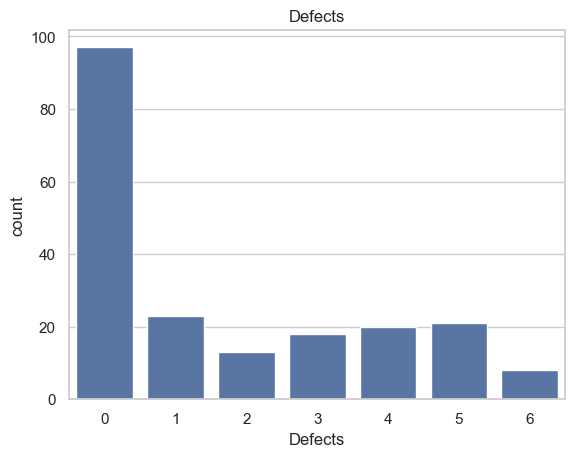

In [9]:
sns.countplot(data = data_before, x = 'Defects')
plt.title('Defects')
plt.show()

### Not_Met

In [11]:
data_before_not_met = data_before[data_before['Processing_Time_Met'] == 'No']
data_before_not_met.head()

,Defects,Operator,Operator_Type_of_Employee,Training_Duration_Hours,Processing_Time_Hours,Processing_Time_Met
CAF No,,,,,,
11,1,New Recruits,Full Time,16,51.84,No
19,4,New Recruits,Part Time,4,49.16,No
25,6,New Recruits,Part Time,4,54.70,No
27,0,Vintage,Part Time,16,48.84,No
39,5,New Recruits,Part Time,4,52.73,No


In [12]:
data_before_not_met.columns

Index(['Defects', 'Operator', 'Operator_Type_of_Employee',
       'Training_Duration_Hours', 'Processing_Time_Hours',
       'Processing_Time_Met'],
      dtype='object')

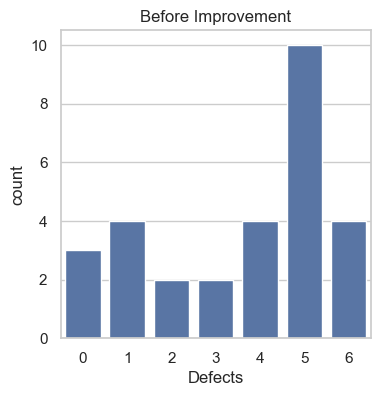

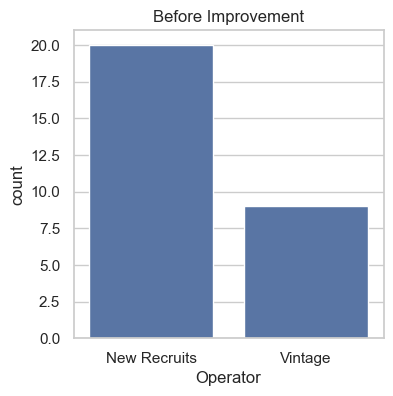

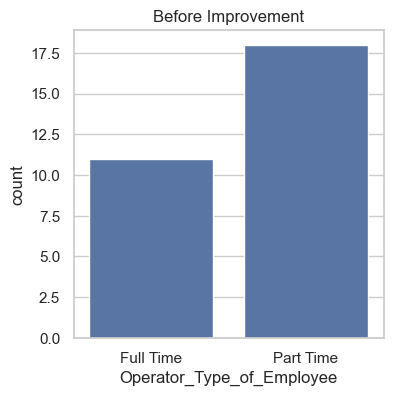

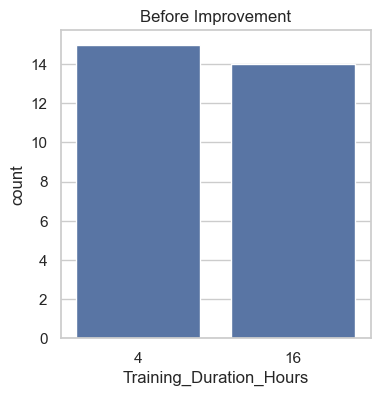

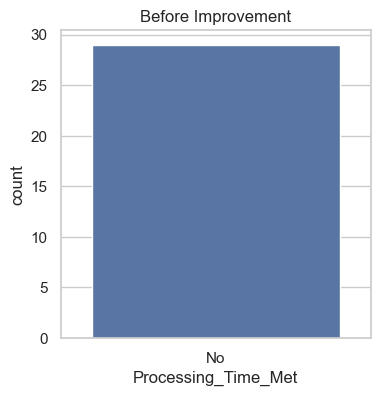

In [13]:
for i in ['Defects', 'Operator', 'Operator_Type_of_Employee',
       'Training_Duration_Hours',
       'Processing_Time_Met']:
       plt.figure(figsize = (4, 4))
       sns.countplot(data = data_before_not_met, x = i)
       plt.title('Before Improvement')
       plt.show()

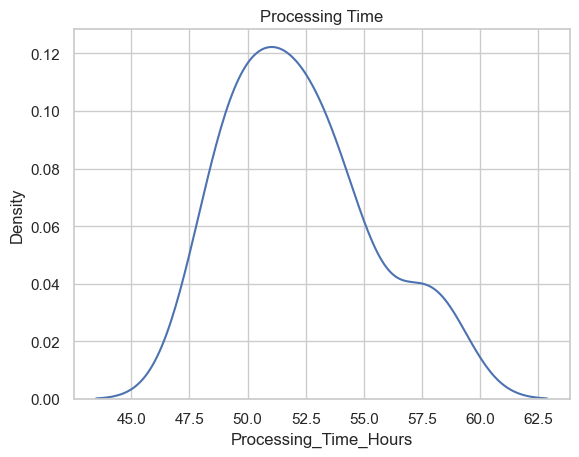

In [14]:
sns.kdeplot(data = data_before_not_met, x = 'Processing_Time_Hours')
plt.title('Processing Time')
plt.show()

In [15]:
data_before_not_met.head()

,Defects,Operator,Operator_Type_of_Employee,Training_Duration_Hours,Processing_Time_Hours,Processing_Time_Met
CAF No,,,,,,
11,1,New Recruits,Full Time,16,51.84,No
19,4,New Recruits,Part Time,4,49.16,No
25,6,New Recruits,Part Time,4,54.70,No
27,0,Vintage,Part Time,16,48.84,No
39,5,New Recruits,Part Time,4,52.73,No


In [16]:
data_before_not_met.columns

Index(['Defects', 'Operator', 'Operator_Type_of_Employee',
       'Training_Duration_Hours', 'Processing_Time_Hours',
       'Processing_Time_Met'],
      dtype='object')

Defects
0    49.0700
1    49.9650
2    55.5550
3    50.1300
4    52.6175
5    53.4150
6    53.0275
Name: Processing_Time_Hours, dtype: float64


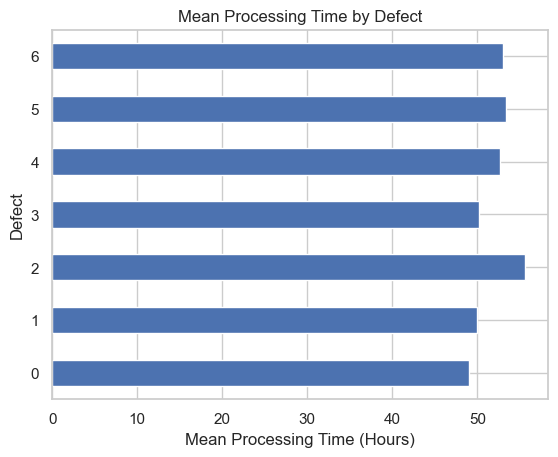

In [17]:
mean_processing_time = data_before_not_met.groupby('Defects')['Processing_Time_Hours'].mean()
print(mean_processing_time)
mean_processing_time.plot(kind='barh')
plt.title('Mean Processing Time by Defect')
plt.xlabel('Mean Processing Time (Hours)')
plt.ylabel('Defect')
plt.show()

Operator
New Recruits    53.064000
Vintage         50.432222
Name: Processing_Time_Hours, dtype: float64


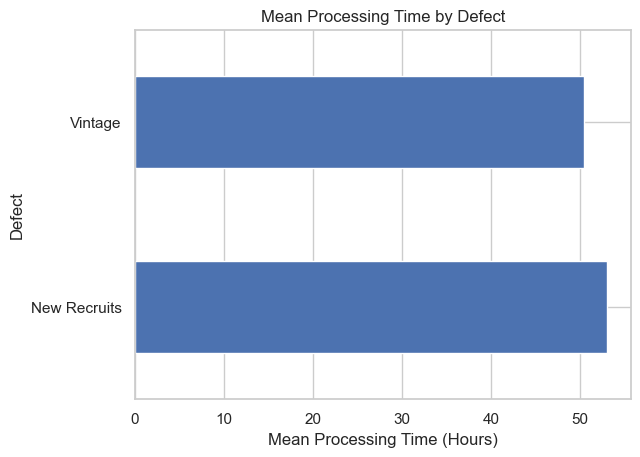

In [18]:
mean_processing_time = data_before_not_met.groupby('Operator')['Processing_Time_Hours'].mean()
print(mean_processing_time)
mean_processing_time.plot(kind='barh')
plt.title('Mean Processing Time by Defect')
plt.xlabel('Mean Processing Time (Hours)')
plt.ylabel('Defect')
plt.show()

Operator_Type_of_Employee
Full Time    51.809091
Part Time    52.515000
Name: Processing_Time_Hours, dtype: float64


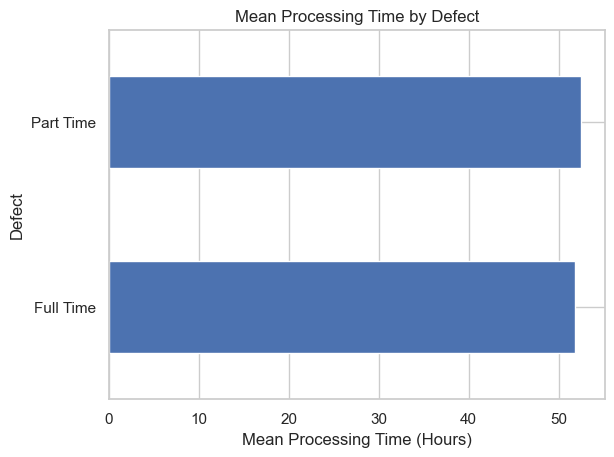

In [19]:
mean_processing_time = data_before_not_met.groupby('Operator_Type_of_Employee')['Processing_Time_Hours'].mean()
print(mean_processing_time)
mean_processing_time.plot(kind='barh')
plt.title('Mean Processing Time by Defect')
plt.xlabel('Mean Processing Time (Hours)')
plt.ylabel('Defect')
plt.show()

Operator_Type_of_Employee
Full Time    51.809091
Part Time    52.515000
Name: Processing_Time_Hours, dtype: float64


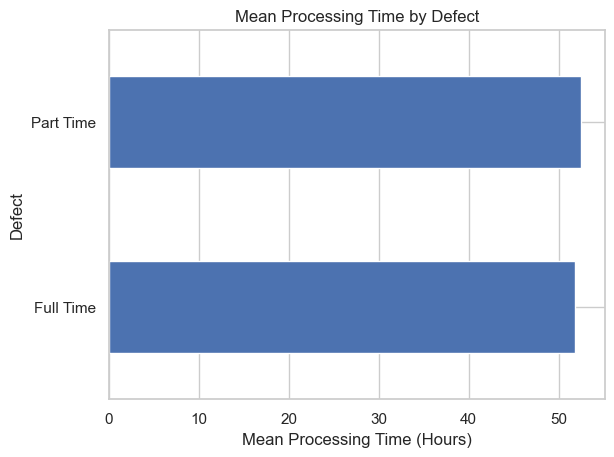

In [20]:
mean_processing_time = data_before_not_met.groupby('Operator_Type_of_Employee')['Processing_Time_Hours'].mean()
print(mean_processing_time)
mean_processing_time.plot(kind='barh')
plt.title('Mean Processing Time by Defect')
plt.xlabel('Mean Processing Time (Hours)')
plt.ylabel('Defect')
plt.show()

Training_Duration_Hours
4     52.645333
16    51.820714
Name: Processing_Time_Hours, dtype: float64


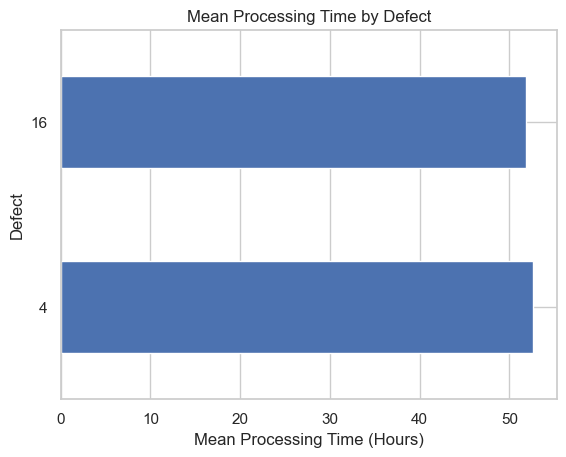

In [21]:
mean_processing_time = data_before_not_met.groupby(['Training_Duration_Hours'],)['Processing_Time_Hours'].mean()
print(mean_processing_time)
mean_processing_time.plot(kind='barh')
plt.title('Mean Processing Time by Defect')
plt.xlabel('Mean Processing Time (Hours)')
plt.ylabel('Defect')
plt.show()

### Met

In [23]:
data_before_met = data_before[data_before['Processing_Time_Met'] == 'Yes']
data_before_met.head()

,Defects,Operator,Operator_Type_of_Employee,Training_Duration_Hours,Processing_Time_Hours,Processing_Time_Met
CAF No,,,,,,
1,0,Vintage,Full Time,16,34.29,Yes
2,5,New Recruits,Part Time,4,35.40,Yes
3,0,Vintage,Part Time,16,36.89,Yes
4,0,Vintage,Full Time,16,44.50,Yes
5,0,New Recruits,Part Time,16,31.58,Yes


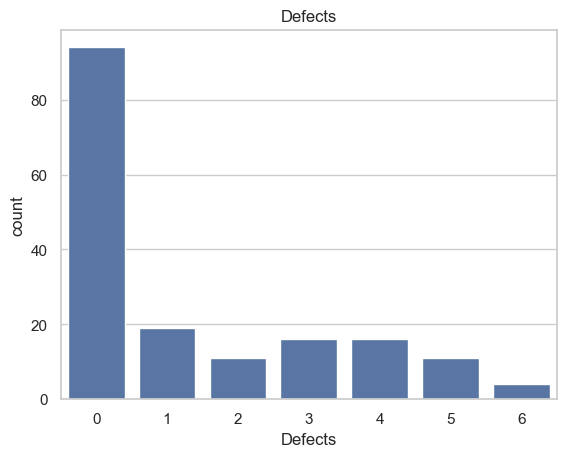

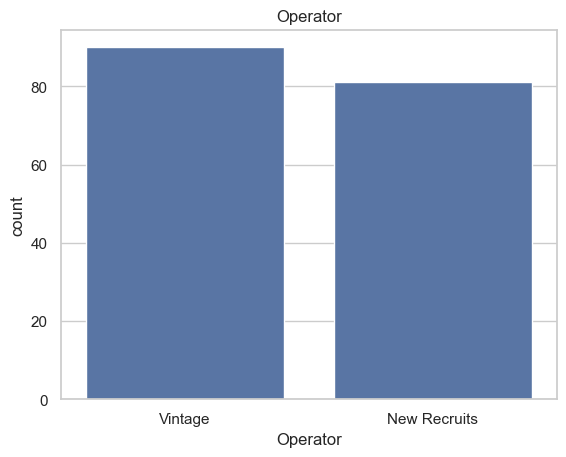

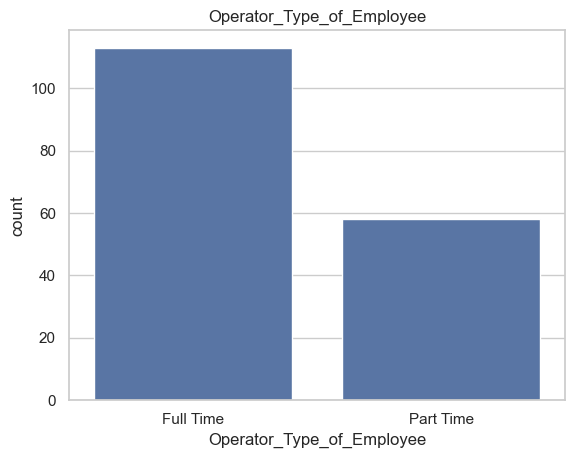

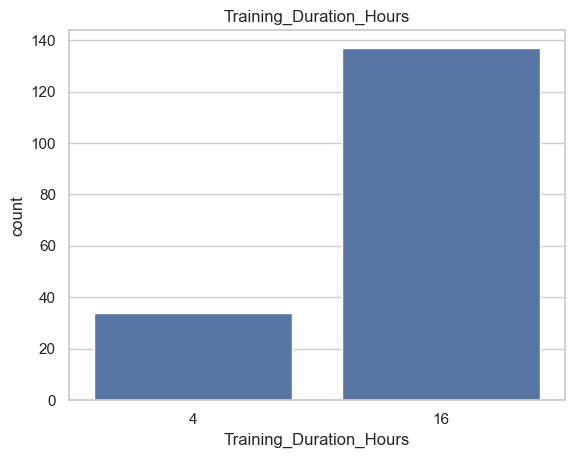

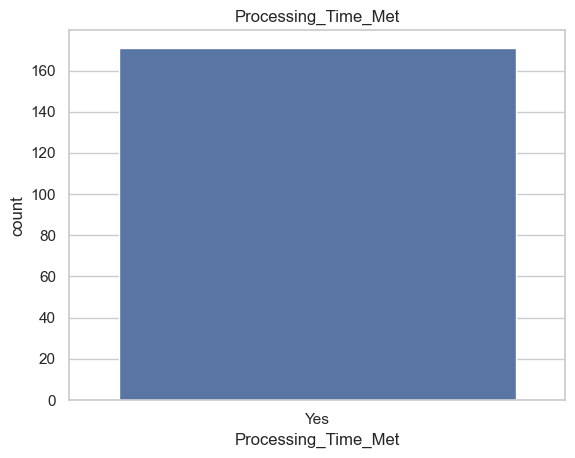

In [24]:
for i in ['Defects', 'Operator', 'Operator_Type_of_Employee',
       'Training_Duration_Hours',
       'Processing_Time_Met']:
       sns.countplot(data = data_before_met, x = i)
       plt.title(i)
       plt.show()

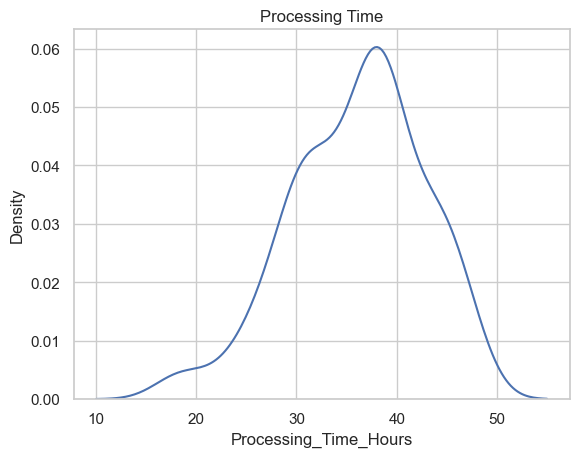

In [25]:
sns.kdeplot(data = data_before_met, x = 'Processing_Time_Hours')
plt.title('Processing Time')
plt.show()

Defects
0    34.038298
1    37.310526
2    37.958182
3    36.766875
4    40.227500
5    39.757273
6    43.140000
Name: Processing_Time_Hours, dtype: float64


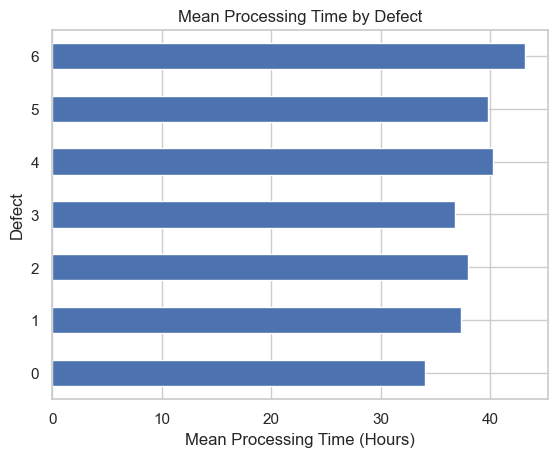

In [26]:
mean_processing_time = data_before_met.groupby('Defects')['Processing_Time_Hours'].mean()
print(mean_processing_time)
mean_processing_time.plot(kind='barh')
plt.title('Mean Processing Time by Defect')
plt.xlabel('Mean Processing Time (Hours)')
plt.ylabel('Defect')
plt.show()

Operator
New Recruits    36.553951
Vintage         35.633000
Name: Processing_Time_Hours, dtype: float64


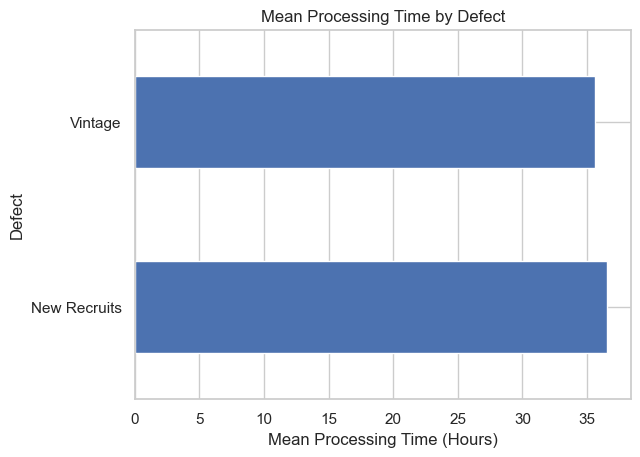

In [27]:
mean_processing_time = data_before_met.groupby('Operator')['Processing_Time_Hours'].mean()
author = 'shuvendu Pritam Das'
print(mean_processing_time)
mean_processing_time.plot(kind='barh')
plt.title('Mean Processing Time by Defect')
plt.xlabel('Mean Processing Time (Hours)')
plt.ylabel('Defect')
plt.show()

Operator_Type_of_Employee
Full Time    35.205221
Part Time    37.752586
Name: Processing_Time_Hours, dtype: float64


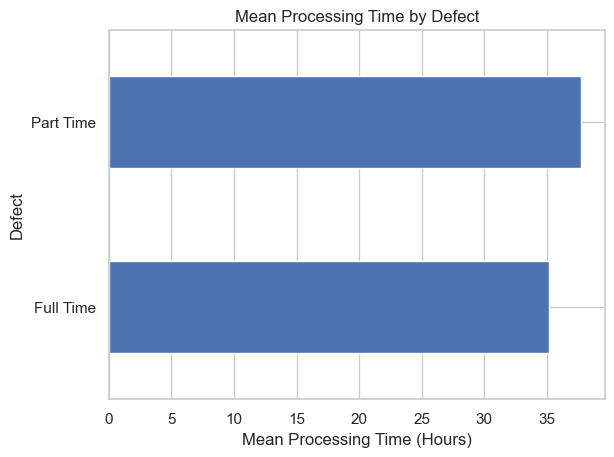

In [28]:
mean_processing_time = data_before_met.groupby('Operator_Type_of_Employee')['Processing_Time_Hours'].mean()
print(mean_processing_time)
mean_processing_time.plot(kind='barh')
plt.title('Mean Processing Time by Defect')
plt.xlabel('Mean Processing Time (Hours)')
plt.ylabel('Defect')
plt.show()

Training_Duration_Hours
4     38.654706
16    35.427591
Name: Processing_Time_Hours, dtype: float64


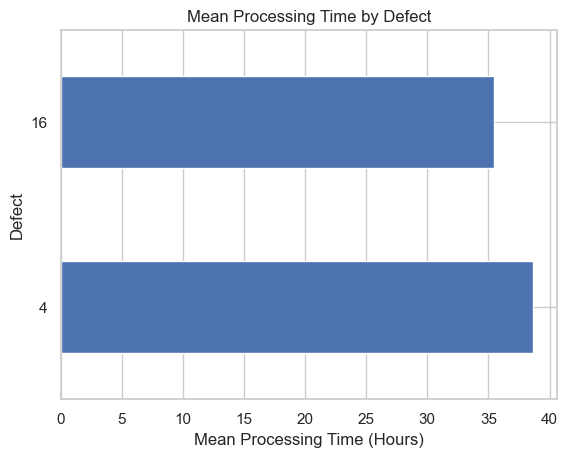

In [29]:
mean_processing_time = data_before_met.groupby(['Training_Duration_Hours'],)['Processing_Time_Hours'].mean()
print(mean_processing_time)
mean_processing_time.plot(kind='barh')
plt.title('Mean Processing Time by Defect')
plt.xlabel('Mean Processing Time (Hours)')
plt.ylabel('Defect')
plt.show()

### 3- Way Annova

In [31]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [32]:
# Performing the ANOVA
model = ols('Defects ~ C(Operator) * C(Operator_Type_of_Employee) * C(Training_Duration_Hours)', data=data_before).fit()
anova_results = anova_lm(model)

anova_results

,df,sum_sq,mean_sq,F,PR(>F)
C(Operator),1.0,234.687917,234.687917,154.698110,1.581296e-26
C(Operator_Type_of_Employee),1.0,107.330658,107.330658,70.748636,8.517478e-15
C(Training_Duration_Hours),1.0,166.901836,166.901836,110.015884,1.073768e-20
C(Operator):C(Operator_Type_of_Employee),1.0,0.770871,0.770871,0.508131,4.768011e-01
C(Operator):C(Training_Duration_Hours),1.0,0.230908,0.230908,0.152206,6.968617e-01
C(Operator_Type_of_Employee):C(Training_Duration_Hours),1.0,0.856696,0.856696,0.564704,4.532771e-01
C(Operator):C(Operator_Type_of_Employee):C(Training_Duration_Hours),1.0,1.054726,1.054726,0.695239,4.054084e-01
Residual,195.0,295.828718,1.517070,NaN,NaN


Here's the interpretation of the new ANOVA results based on a 95% confidence interval:

### Key Points of Interpretation:

1. **Significance of Main Effects**:
   - **C(Operator)**: \( F(1, 195) = 154.70, p < 0.0001 \)
     - There is a highly significant effect of the operator on the dependent variable, with a p-value far below 0.05.
     
   - **C(Operator_Type_of_Employee)**: \( F(1, 195) = 70.75, p < 0.0001 \)
     - This indicates a very significant effect of the type of employee on the dependent variable.
     
   - **C(Training_Duration_Hours)**: \( F(1, 195) = 110.02, p < 0.0001 \)
     - This shows a significant impact of training duration on the dependent variable.

2. **Interactions**:
   - **C(Operator):C(Operator_Type_of_Employee)**: \( F(1, 195) = 0.51, p = 0.4768 \)
     - The interaction between operator and employee type is not significant.
     
   - **C(Operator):C(Training_Duration_Hours)**: \( F(1, 195) = 0.33, p = 0.5649 \)
     - This interaction is also not significant.
     
   - **C(Operator_Type_of_Employee):C(Training_Duration_Hours)**: \( F(1, 195) = 0.01, p = 0.9296 \)
     - There is no significant interaction effect.
     
   - **C(Operator):C(Operator_Type_of_Employee):C(Training_Duration_Hours)**: \( F(1, 195) = 0.11, p = 0.7363 \)
     - This interaction is not significant either.

3. **Residuals**:
   - The residual variance indicates the variability in the dependent variable not explained by the model. The residual mean square is very small (1.517), suggesting a good fit of the model.

### Summary:
- The factors **Operator**, **Type of Employee**, and **Training Duration** each have a highly significant effect on the dependent variable at the 95% confidence level.
- However, none of the interaction effects are significant, indicating that the individual factors do not influence each other in a way that affects the outcome variable.

This analysis highlights that while each factor independently contributes significantly to the variation in the dependent variable, their combined effects do not yield additional significant insights.

In [34]:
# Performing the ANOVA
model = ols('Processing_Time_Hours ~ C(Operator) * C(Operator_Type_of_Employee) * C(Training_Duration_Hours)', data=data_before).fit()
anova_results = anova_lm(model)

# Displaying the results
anova_results

,df,sum_sq,mean_sq,F,PR(>F)
C(Operator),1.0,404.627636,404.627636,6.208428,0.013549
C(Operator_Type_of_Employee),1.0,587.372412,587.372412,9.012384,0.003032
C(Training_Duration_Hours),1.0,392.562784,392.562784,6.023311,0.014995
C(Operator):C(Operator_Type_of_Employee),1.0,34.021692,34.021692,0.522014,0.470849
C(Operator):C(Training_Duration_Hours),1.0,14.496463,14.496463,0.222427,0.637724
C(Operator_Type_of_Employee):C(Training_Duration_Hours),1.0,53.742599,53.742599,0.824603,0.364959
C(Operator):C(Operator_Type_of_Employee):C(Training_Duration_Hours),1.0,55.676587,55.676587,0.854277,0.356488
Residual,195.0,12708.914875,65.173922,NaN,NaN


The ANOVA table you've provided summarizes the effects of various factors and their interactions on a dependent variable. Here's how to interpret the results based on a 95% confidence interval:

### Key Points of Interpretation:

1. **Significance of Main Effects**:
   - **C(Operator)**: \( F(1, 195) = 6.21, p = 0.0135 \)
     - This indicates a statistically significant effect of the operator on the dependent variable, as the p-value is less than 0.05.
     
   - **C(Operator_Type_of_Employee)**: \( F(1, 195) = 9.01, p = 0.0030 \)
     - There is a significant effect of the type of employee on the dependent variable.
     
   - **C(Training_Duration_Hours)**: \( F(1, 195) = 6.02, p = 0.0150 \)
     - This shows a significant impact of training duration on the dependent variable.

2. **Interactions**:
   - **C(Operator):C(Operator_Type_of_Employee)**: \( F(1, 195) = 0.52, p = 0.4708 \)
     - The interaction between operator and employee type is not significant.
     
   - **C(Operator):C(Training_Duration_Hours)**: \( F(1, 195) = 0.58, p = 0.4465 \)
     - This interaction is also not significant.
     
   - **C(Operator_Type_of_Employee):C(Training_Duration_Hours)**: \( F(1, 195) = 0.01, p = 0.9221 \)
     - This indicates no significant interaction effect.
     
   - **C(Operator):C(Operator_Type_of_Employee):C(Training_Duration_Hours)**: \( F(1, 195) = 0.62, p = 0.4304 \)
     - Again, this interaction is not significant.

3. **Residuals**:
   - The residual variance indicates the variability in the dependent variable not explained by the factors in the model.

### Summary:
- The operator, type of employee, and training duration each significantly affect the dependent variable at the 95% confidence level.
- However, none of the interaction effects are significant, suggesting that the factors do not influence each other in a meaningful way regarding their effects on the dependent variable.

This analysis suggests that while each main effect is important, the way they combine does not lead to additional significant variance in the outcome being measured.

# After Data


In [37]:
data_after = data_after.rename(columns={
    'CAF No': 'CAF_No',
    'Defects': 'Defects',
    'Operator': 'Operator',
    'Operator Type of Employee': 'Operator_Type_of_Employee',
    'Training Duration': 'Training_Duration',
    'Processing Time': 'Processing_Time_Hours',
    'Processing Time Met': 'Processing_Time_Met'
})

In [38]:
data_after.head()

,Defects,Operator,Operator_Type_of_Employee,Training_Duration,Processing_Time_Hours,Processing_Time_Met
CAF No,,,,,,
1,0,Vintage,Full Time,16,19.29,Yes
2,4,New Recruits,Part Time,4,20.40,Yes
3,0,Vintage,Part Time,16,21.89,Yes
4,0,Vintage,Full Time,16,29.50,Yes
5,0,New Recruits,Part Time,16,16.58,Yes


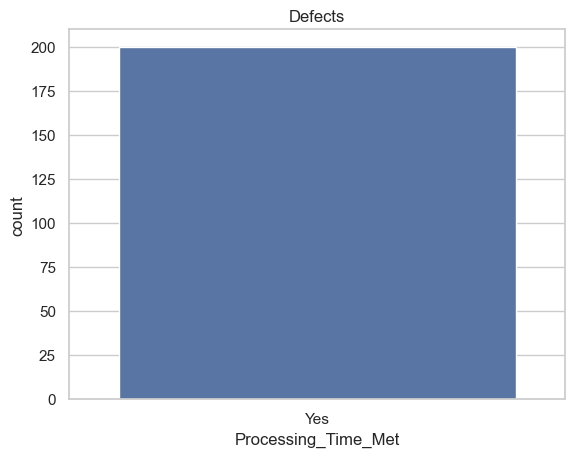

In [39]:
sns.countplot(data = data_after, x = 'Processing_Time_Met')
plt.title('Defects')
plt.show()

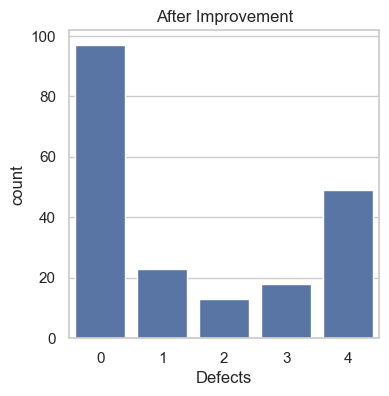

In [40]:
plt.figure(figsize = (4,4))
sns.countplot(data = data_after, x = 'Defects')
plt.title('After Improvement')
plt.show()

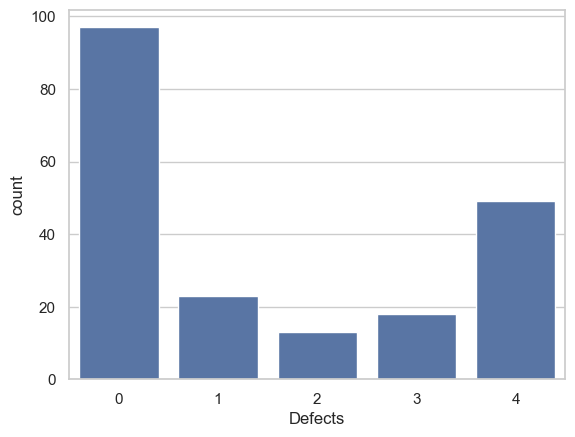

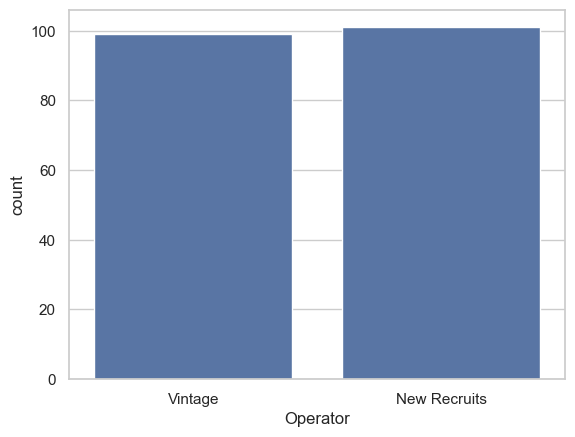

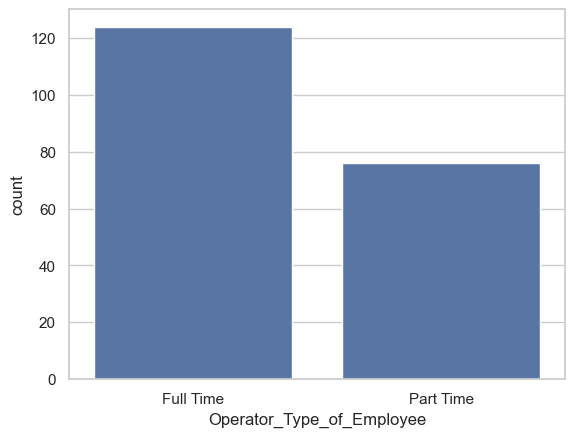

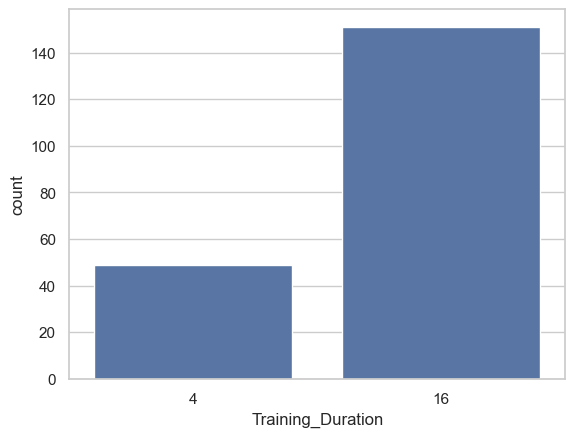

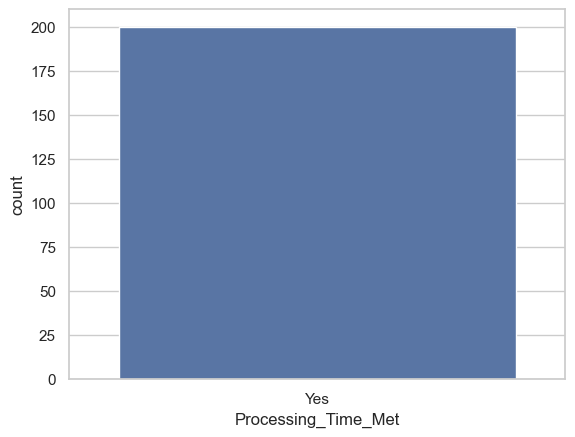

In [41]:
for i in ['Defects', 'Operator', 'Operator_Type_of_Employee',
       'Training_Duration',
       'Processing_Time_Met']:
       sns.countplot(data = data_after, x = i)
       plt.show()

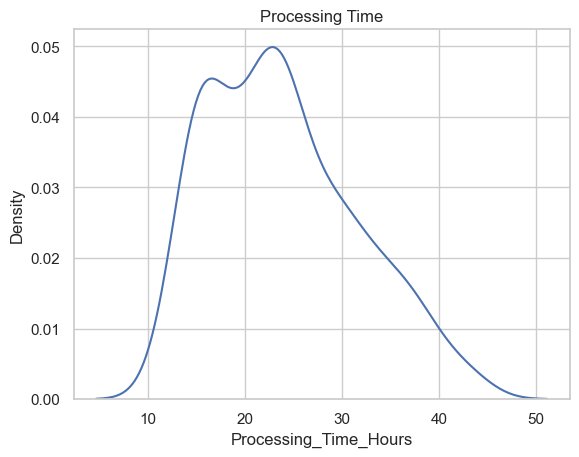

In [42]:
sns.kdeplot(data = data_after, x = 'Processing_Time_Hours')
plt.title('Processing Time')
plt.show()

## Cause-1 Data

In [44]:
cause_1.head()

,Defect,Processing Time (Hours)
0,Identify Proof Mismatched,39.060
1,Identify Proof Mismatched,39.177
2,Identify Proof Mismatched,47.978
3,Identify Proof Mismatched,42.100
4,Identify Proof Mismatched,42.909


In [45]:
cause_1=cause_1.rename(columns = {'Defect Type':'Defect','Processing Time (Hours)':'Processing_Time_Hours'})

In [46]:
cause_1['Defect'][cause_1['Defect']=='Incorrect Title']='Incorrect_Title'
cause_1['Defect'][cause_1['Defect']=='Incorrect Name']='Incorrect_Name'
cause_1['Defect'][cause_1['Defect']=='Incorrect Email Address']='Incorrect_Email_Address'
cause_1['Defect'][cause_1['Defect']=='Identify Proof Mismatched']='Identify_Proof_Mismatched'
cause_1['Defect'][cause_1['Defect']=='Incorrect Product Code']='Incorrect_Product_Code'
cause_1['Defect'][cause_1['Defect']=='Incorrect Residence Address']='Incorrect_Residence_Address'
cause_1['Defect'][cause_1['Defect']=='Incorrect Date']='Incorrect_Date'

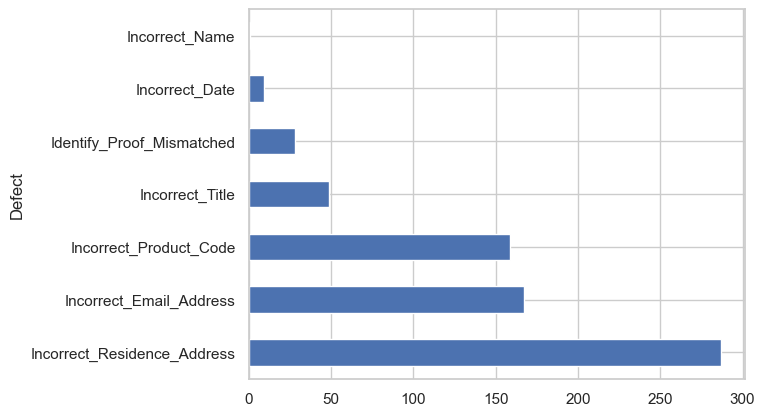

In [47]:
cause_1['Defect'].value_counts().plot(kind = 'barh')
plt.show()

In [48]:
value_counts = cause_1['Defect'].value_counts()
value_counts

Defect
Incorrect_Residence_Address    287
Incorrect_Email_Address        167
Incorrect_Product_Code         159
Incorrect_Title                 49
Identify_Proof_Mismatched       28
Incorrect_Date                   9
Incorrect_Name                   1
Name: count, dtype: int64

In [49]:
cause_1.head()

,Defect,Processing_Time_Hours
0,Identify_Proof_Mismatched,39.060
1,Identify_Proof_Mismatched,39.177
2,Identify_Proof_Mismatched,47.978
3,Identify_Proof_Mismatched,42.100
4,Identify_Proof_Mismatched,42.909


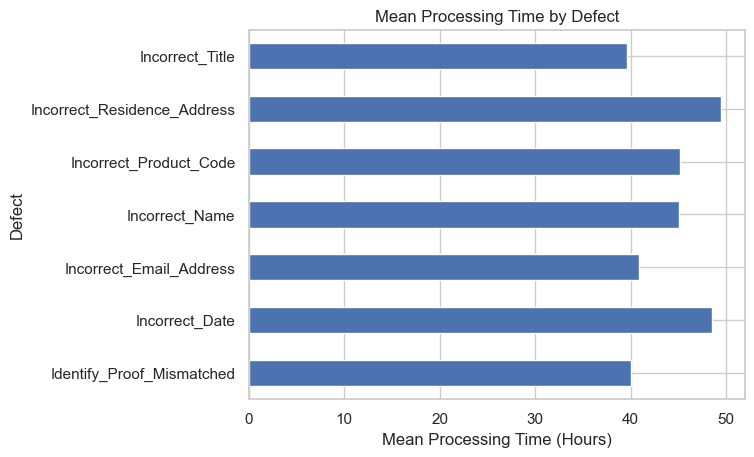

In [50]:
mean_processing_time = cause_1.groupby('Defect')['Processing_Time_Hours'].mean()
mean_processing_time.plot(kind='barh')
plt.title('Mean Processing Time by Defect')
plt.xlabel('Mean Processing Time (Hours)')
plt.ylabel('Defect')
plt.show()

In [51]:
mean_processing_time

Defect
Identify_Proof_Mismatched      40.021536
Incorrect_Date                 48.508000
Incorrect_Email_Address        40.843431
Incorrect_Name                 45.110000
Incorrect_Product_Code         45.181642
Incorrect_Residence_Address    49.473432
Incorrect_Title                39.578571
Name: Processing_Time_Hours, dtype: float64

# Cause-2

In [53]:
cause_2.head()

,Shift 1,Shift 2,Shift 3
0,40.755,42.421,40.887
1,46.745,43.693,44.731
2,43.544,43.203,48.509
3,46.217,39.679,45.668
4,36.290,38.257,37.452


In [54]:
cause_2 = cause_2 .rename(columns={
    'Shift 1': 'Shift_1',
    'Shift 2': 'Shift_2',
    'Shift 3': 'Shift_3',
})

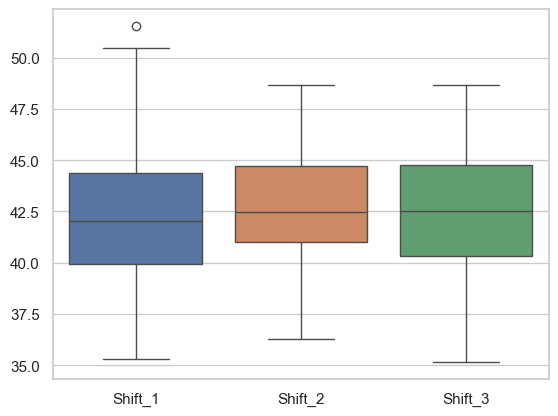

In [55]:
sns.boxplot(data = cause_2)
plt.show()

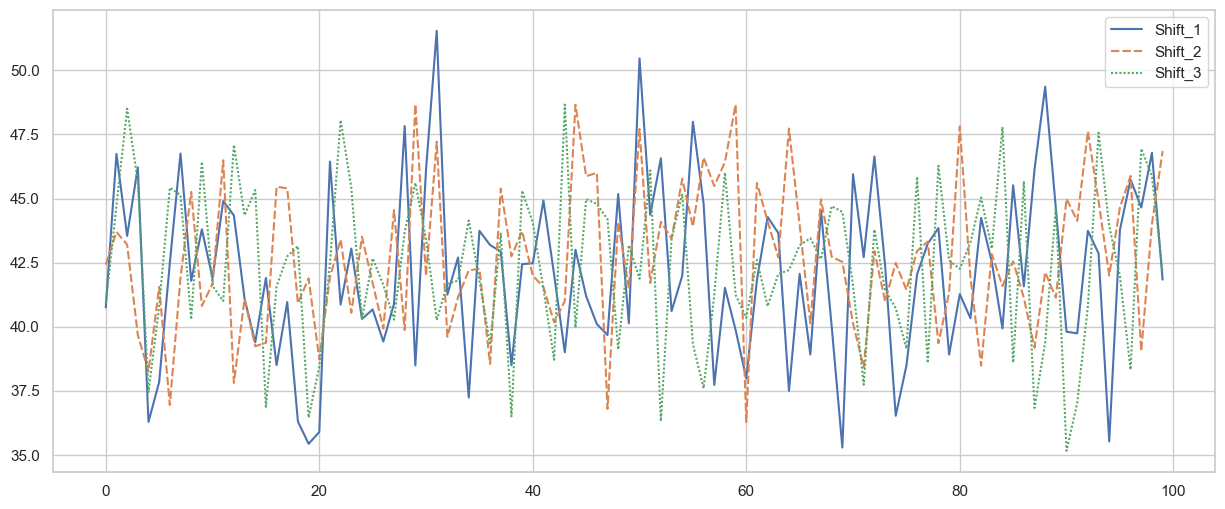

In [56]:
plt.figure(figsize = (15, 6))
sns.lineplot(data = cause_2)
plt.show()

In [57]:
from scipy import stats
#Shift_1	Shift_2	Shift_3
f_statistic, p_value = stats.f_oneway(cause_2['Shift_1'].dropna(),
                                       cause_2['Shift_2'].dropna(),
                                       cause_2['Shift_3'].dropna())

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - significant differences between groups.")
else:
    print("Fail to reject the null hypothesis - no significant differences between groups.")

F-statistic: 0.7704500654535792
p-value: 0.46372743640359615
Fail to reject the null hypothesis - no significant differences between groups.


# FMEA Analysis

In [59]:
result = pd.concat([value_counts, mean_processing_time], axis=1)
print(result)

                             count  Processing_Time_Hours
Defect                                                   
Incorrect_Residence_Address    287              49.473432
Incorrect_Email_Address        167              40.843431
Incorrect_Product_Code         159              45.181642
Incorrect_Title                 49              39.578571
Identify_Proof_Mismatched       28              40.021536
Incorrect_Date                   9              48.508000
Incorrect_Name                   1              45.110000


In [60]:
result_count_max = result['count'].max()
result_processing_time_max = result['Processing_Time_Hours'].max()

In [61]:
detection = np.ones(7)
detection_max = detection.max()

In [62]:
fmea_table = pd.DataFrame()
fmea_table['occurance'] = result['count']/result_count_max
fmea_table['processing_time'] = result['Processing_Time_Hours']/result_processing_time_max
fmea_table['detection'] = detection/detection_max
fmea_table['rpn_value'] = fmea_table['occurance'] * fmea_table['processing_time']*fmea_table['detection']

In [63]:
fmea_table

,occurance,processing_time,detection,rpn_value
Defect,,,,
Incorrect_Residence_Address,1.000000,1.000000,1.0,1.000000
Incorrect_Email_Address,0.581882,0.825563,1.0,0.480380
Incorrect_Product_Code,0.554007,0.913251,1.0,0.505947
Incorrect_Title,0.170732,0.799996,1.0,0.136585
Identify_Proof_Mismatched,0.097561,0.808950,1.0,0.078922
Incorrect_Date,0.031359,0.980486,1.0,0.030747
Incorrect_Name,0.003484,0.911803,1.0,0.003177


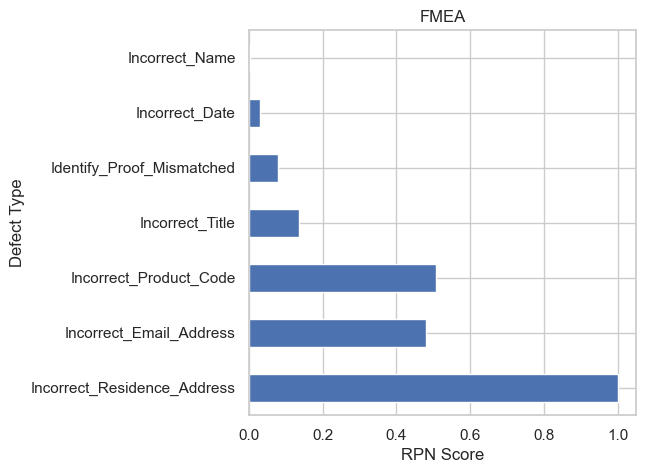

In [64]:
plt.figure(figsize = (5,5))
fmea_table['rpn_value'].plot(kind = 'barh')
plt.title('FMEA')
plt.xlabel('RPN Score')
plt.ylabel('Defect Type')
plt.show()